In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress warnings temporarily
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv('laptop_prices.csv')

In [ ]:
df.head(10)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
5,Acer,AMD Ryzen 3,64,2TB SSD,Nvidia RTX 3060,14.0,1366x768,7.1,1.85,Linux,1676.64
6,Dell,Intel i5,8,1TB SSD,Nvidia RTX 2060,15.6,2560x1440,9.1,1.98,Windows,1449.05
7,Microsoft,AMD Ryzen 9,8,1TB SSD,Nvidia RTX 3080,17.3,2560x1440,9.8,1.26,Linux,2193.55
8,Apple,Intel i5,64,256GB SSD,Nvidia RTX 2060,15.6,3840x2160,11.5,1.48,Linux,6409.03
9,HP,AMD Ryzen 5,4,1TB SSD,AMD Radeon RX 6800,14.0,3840x2160,7.5,2.19,FreeDOS,1556.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [ ]:
print(df.isnull().sum())

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df['Brand'].unique())
print(df['Processor'].unique())
print(df['GPU'].unique())
print(df['Resolution'].unique())
print(df['Operating System'].unique())
print(df['Storage'].unique())

['Apple' 'Razer' 'Asus' 'Lenovo' 'Acer' 'Dell' 'Microsoft' 'HP' 'Samsung'
 'MSI']
['AMD Ryzen 3' 'AMD Ryzen 7' 'Intel i5' 'Intel i3' 'AMD Ryzen 9'
 'AMD Ryzen 5' 'Intel i9' 'Intel i7']
['Nvidia GTX 1650' 'Nvidia RTX 3080' 'Nvidia RTX 3060'
 'AMD Radeon RX 6600' 'Nvidia RTX 2060' 'AMD Radeon RX 6800' 'Integrated']
['2560x1440' '1366x768' '3840x2160' '1920x1080']
['FreeDOS' 'Linux' 'Windows' 'macOS']
['512GB SSD' '1TB SSD' '2TB SSD' '256GB SSD' '1TB HDD']


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_cols = ["Brand", "Processor", "GPU", "Operating System"]
label_encoders = {col: LabelEncoder() for col in label_cols}

for col in label_cols:
    df[col] = label_encoders[col].fit_transform(df[col])
for col in label_cols:
    print(f"Label Mapping for {col}:")
    labels = dict(enumerate(label_encoders[col].classes_))
    print(labels, "\n")
df = pd.get_dummies(df, columns=["Storage", "Resolution"], drop_first=True)
df.to_csv("encoded_laptop_prices.csv", index=False)


Label Mapping for Brand:
{0: 'Acer', 1: 'Apple', 2: 'Asus', 3: 'Dell', 4: 'HP', 5: 'Lenovo', 6: 'MSI', 7: 'Microsoft', 8: 'Razer', 9: 'Samsung'} 

Label Mapping for Processor:
{0: 'AMD Ryzen 3', 1: 'AMD Ryzen 5', 2: 'AMD Ryzen 7', 3: 'AMD Ryzen 9', 4: 'Intel i3', 5: 'Intel i5', 6: 'Intel i7', 7: 'Intel i9'} 

Label Mapping for GPU:
{0: 'AMD Radeon RX 6600', 1: 'AMD Radeon RX 6800', 2: 'Integrated', 3: 'Nvidia GTX 1650', 4: 'Nvidia RTX 2060', 5: 'Nvidia RTX 3060', 6: 'Nvidia RTX 3080'} 

Label Mapping for Operating System:
{0: 'FreeDOS', 1: 'Linux', 2: 'Windows', 3: 'macOS'} 



In [ ]:
df.head()

,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_1TB SSD,Storage_256GB SSD,Storage_2TB SSD,Storage_512GB SSD,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160
0,1,0,64,3,17.3,8.9,1.42,0,3997.07,False,False,False,True,False,True,False
1,8,2,4,6,14.0,9.4,2.57,1,1355.78,True,False,False,False,False,False,False
2,2,5,32,5,13.3,8.5,1.74,0,2673.07,False,False,True,False,False,False,True
3,5,5,4,6,13.3,10.5,3.10,2,751.17,False,True,False,False,False,False,False
4,8,4,4,0,16.0,5.7,3.38,1,2059.83,False,True,False,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  int64  
 1   Processor             11768 non-null  int64  
 2   RAM (GB)              11768 non-null  int64  
 3   GPU                   11768 non-null  int64  
 4   Screen Size (inch)    11768 non-null  float64
 5   Battery Life (hours)  11768 non-null  float64
 6   Weight (kg)           11768 non-null  float64
 7   Operating System      11768 non-null  int64  
 8   Price ($)             11768 non-null  float64
 9   Storage_1TB SSD       11768 non-null  bool   
 10  Storage_256GB SSD     11768 non-null  bool   
 11  Storage_2TB SSD       11768 non-null  bool   
 12  Storage_512GB SSD     11768 non-null  bool   
 13  Resolution_1920x1080  11768 non-null  bool   
 14  Resolution_2560x1440  11768 non-null  bool   
 15  Resolution_3840x216

Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

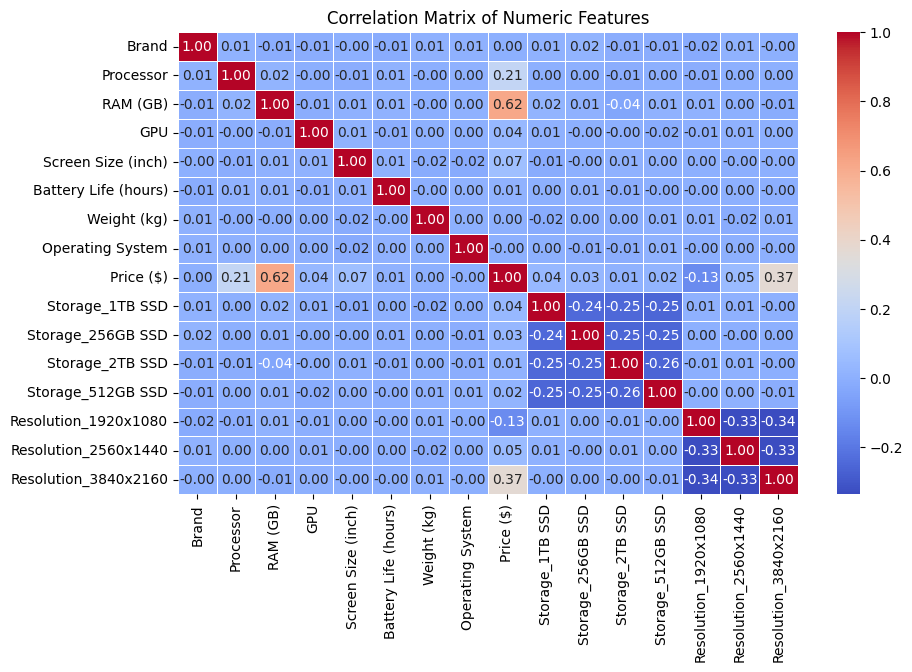

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")

<Axes: xlabel='Price ($)', ylabel='Density'>

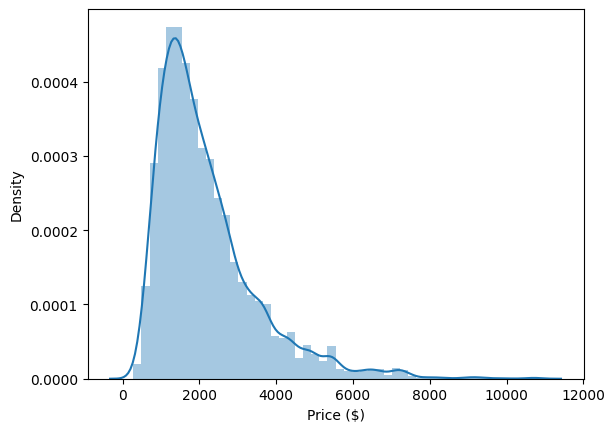

In [ ]:
sns.distplot(df['Price ($)'])

In [ ]:
from scipy.stats import skew

# Check skewness of the price column
skewness = skew(df["Price ($)"])
print(f"Skewness of Laptop Prices: {skewness:.2f}")

Skewness of Laptop Prices: 1.76


{0: 'AMD Ryzen 3', 1: 'AMD Ryzen 5', 2: 'AMD Ryzen 7', 3: 'AMD Ryzen 9', 4: 'Intel i3', 5: 'Intel i5', 6: 'Intel i7', 7: 'Intel i9'}


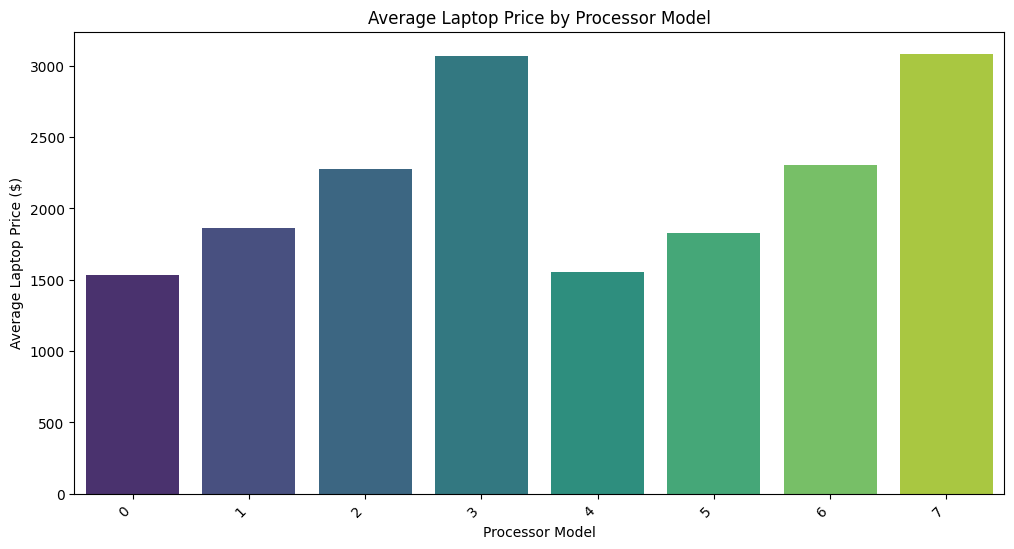

In [ ]:
avg_price_per_processor = df.groupby("Processor")["Price ($)"].mean().sort_values()


processor_labels = dict(enumerate(label_encoders["Processor"].classes_))
print(processor_labels)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_per_processor.index, y=avg_price_per_processor.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Processor Model")
plt.ylabel("Average Laptop Price ($)")
plt.title("Average Laptop Price by Processor Model")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Price ($)"])
y = df["Price ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=101)
random_forest = RandomForestRegressor(n_estimators=100, random_state=101)

linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [ ]:
coeff_df = pd.DataFrame(linear_reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Brand,3.325245
Processor,113.936720
RAM (GB),36.934846
GPU,28.675838
Screen Size (inch),60.158715
Battery Life (hours),4.269649
Weight (kg),20.277266
Operating System,-5.307676
Storage_1TB SSD,364.510507
Storage_256GB SSD,364.740028


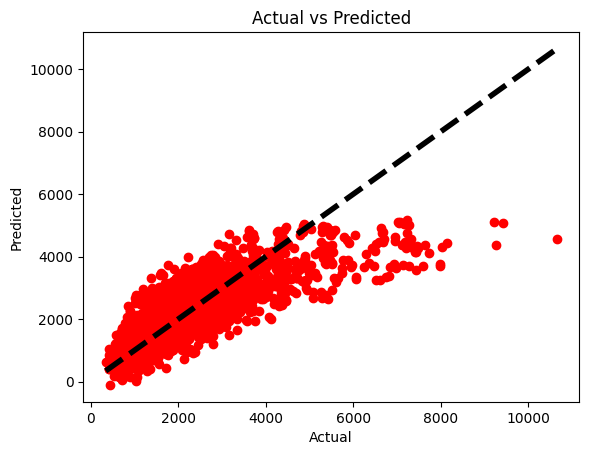

In [ ]:
predictions = linear_reg.predict(X_test)
plt.scatter(y_test,predictions, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

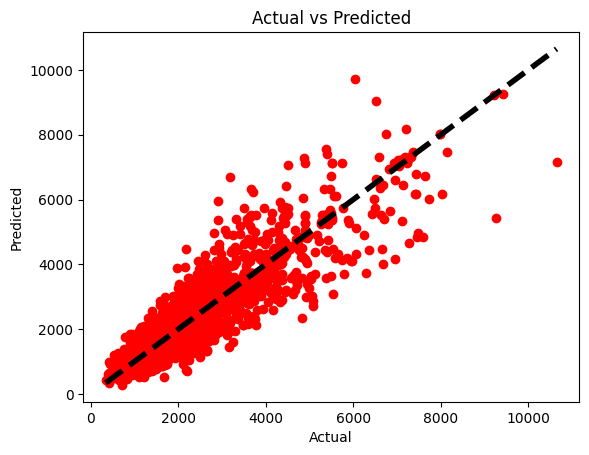

In [ ]:
predictions = decision_tree.predict(X_test)
plt.scatter(y_test,predictions, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

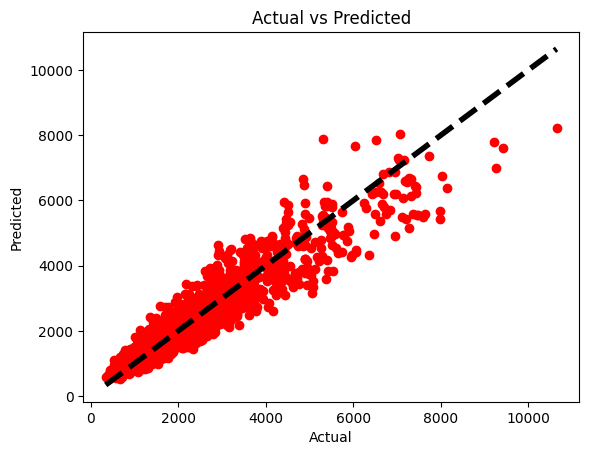

In [ ]:
predictions = random_forest.predict(X_test)
plt.scatter(y_test,predictions, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\n🔹 **{model_name} Performance:**")
    print(f"  ✅ R² Score (Train): {r2_score(y_train, y_train_pred):.4f}")
    print(f"  ✅ R² Score (Test) : {r2_score(y_test, y_test_pred):.4f}")
    print(f"  ✅ MAE (Test)      : {mean_absolute_error(y_test, y_test_pred):.2f}")
    print(f"  ✅ MSE (Test)      : {mean_squared_error(y_test, y_test_pred):.2f}")


evaluate_model(linear_reg, X_train, X_test, y_train, y_test, "Linear Regression")
evaluate_model(decision_tree, X_train, X_test, y_train, y_test, "Decision Tree")
evaluate_model(random_forest, X_train, X_test, y_train, y_test, "Random Forest")


🔹 **Linear Regression Performance:**
  ✅ R² Score (Train): 0.6184
  ✅ R² Score (Test) : 0.6324
  ✅ MAE (Test)      : 587.25
  ✅ MSE (Test)      : 677306.87

🔹 **Decision Tree Performance:**
  ✅ R² Score (Train): 1.0000
  ✅ R² Score (Test) : 0.8075
  ✅ MAE (Test)      : 390.72
  ✅ MSE (Test)      : 354660.75

🔹 **Random Forest Performance:**
  ✅ R² Score (Train): 0.9836
  ✅ R² Score (Test) : 0.8925
  ✅ MAE (Test)      : 303.49
  ✅ MSE (Test)      : 198131.05


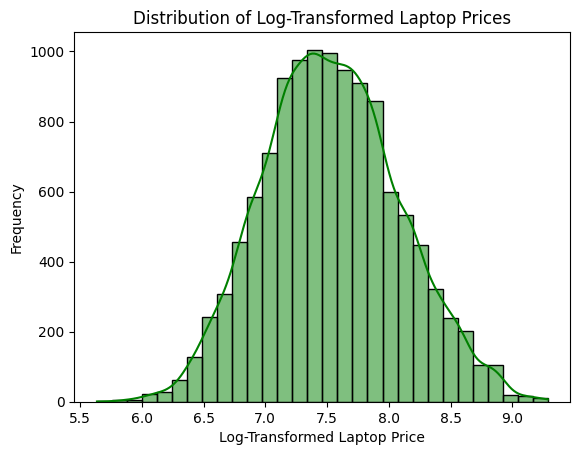

In [ ]:
df["Log_Price"] = np.log1p(df["Price ($)"])
sns.histplot(df["Log_Price"], bins=30, kde=True, color="green")
plt.xlabel("Log-Transformed Laptop Price")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed Laptop Prices")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Price ($)","Log_Price"],axis=1)
y = df["Log_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=101)
random_forest = RandomForestRegressor(n_estimators=100, random_state=101)

linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

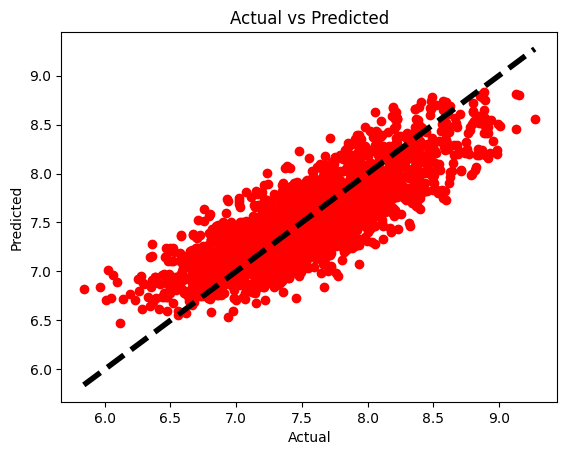

In [ ]:
predictions = linear_reg.predict(X_test)
plt.scatter(y_test,predictions, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\n🔹 **{model_name} Performance:**")
    print(f"  ✅ R² Score (Train): {r2_score(y_train, y_train_pred):.4f}")
    print(f"  ✅ R² Score (Test) : {r2_score(y_test, y_test_pred):.4f}")
    print(f"  ✅ MAE (Test)      : {mean_absolute_error(y_test, y_test_pred):.2f}")
    print(f"  ✅ MSE (Test)      : {mean_squared_error(y_test, y_test_pred):.2f}")


evaluate_model(linear_reg, X_train, X_test, y_train, y_test, "Linear Regression")
evaluate_model(decision_tree, X_train, X_test, y_train, y_test, "Decision Tree")
evaluate_model(random_forest, X_train, X_test, y_train, y_test, "Random Forest")


🔹 **Linear Regression Performance:**
  ✅ R² Score (Train): 0.6715
  ✅ R² Score (Test) : 0.6852
  ✅ MAE (Test)      : 0.25
  ✅ MSE (Test)      : 0.10

🔹 **Decision Tree Performance:**
  ✅ R² Score (Train): 1.0000
  ✅ R² Score (Test) : 0.7942
  ✅ MAE (Test)      : 0.19
  ✅ MSE (Test)      : 0.06

🔹 **Random Forest Performance:**
  ✅ R² Score (Train): 0.9846
  ✅ R² Score (Test) : 0.8993
  ✅ MAE (Test)      : 0.14
  ✅ MSE (Test)      : 0.03
